### ✅ **Session 1 – Understanding Pyomo’s Structure**

### 🔑 **Key components in any Pyomo model**

1. **Model** – A container for all parts of the optimization problem.
2. **Parameters** – Known data values (constants).
3. **Variables** – Decision variables the solver adjusts.
4. **Objective** – What you are trying to maximize or minimize.
5. **Constraints** – Rules or limits that the solution must satisfy.

---

### 📦 **Example Problem 1 – A Simple Linear Programming (LP) Model**

**Problem Statement:**
You want to decide how much of two products, x and y, to produce to maximize profit.

* Profit for x = \$40 per unit
* Profit for y = \$30 per unit

**Constraints:**

* Resource 1: 2x + y ≤ 100
* Resource 2: x + 2y ≤ 80
* Non-negativity: x ≥ 0, y ≥ 0
---

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\desai\AppData\Local\Temp\tmpq_87u8iq.glpk.raw --wglp C:\Users\desai\AppData\Local\Temp\tmplp43ahur.glpk.glp
 --cpxlp C:\Users\desai\AppData\Local\Temp\tmp2miw7i9b.pyomo.lp
Reading problem data from 'C:\Users\desai\AppData\Local\Temp\tmp2miw7i9b.pyomo.lp'...
2 rows, 2 columns, 4 non-zeros
23 lines were read
Writing problem data to 'C:\Users\desai\AppData\Local\Temp\tmplp43ahur.glpk.glp'...
15 lines were written
GLPK Simplex Optimizer, v4.65
2 rows, 2 columns, 4 non-zeros
Preprocessing...
2 rows, 2 columns, 4 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  2.000e+00  ratio =  2.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 2
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =   2.200000000e+03 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (32380 bytes)
Writing basic 

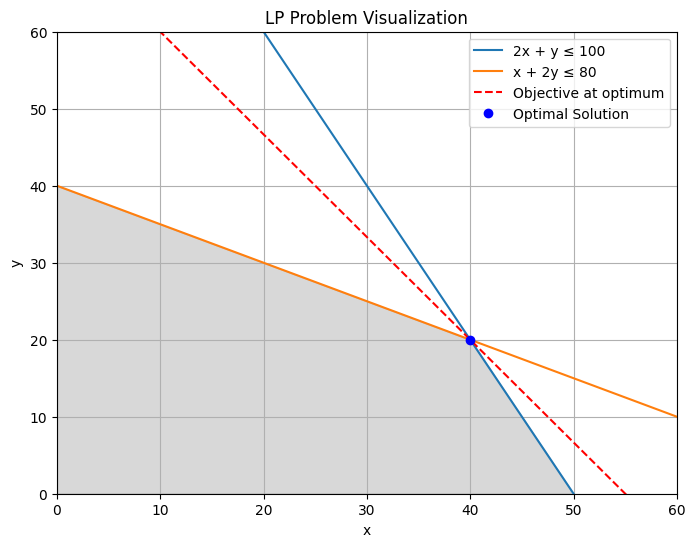

In [ ]:
# Importing necessary libraries
from pyomo.environ import ConcreteModel, Var, Objective, Constraint, SolverFactory, NonNegativeReals, maximize
import matplotlib.pyplot as plt
import numpy as np

# Create model
model = ConcreteModel()
model.x = Var(domain=NonNegativeReals)
model.y = Var(domain=NonNegativeReals)

# Objective
model.profit = Objective(expr = 40 * model.x + 30 * model.y, sense=maximize)

# Constraints
model.resource1 = Constraint(expr = 2 * model.x + model.y <= 100)
model.resource2 = Constraint(expr = model.x + 2 * model.y <= 80)

# Solve with GLPK
"""
GLPK (GNU Linear Programming Kit) is a free software package intended for 
solving large-scale linear programming (LP), mixed integer programming (MIP), and other related problems. 
It is widely used in operations research and optimization tasks.
"""
solver = SolverFactory('glpk')
result = solver.solve(model, tee=True)

# Print results
print("Optimal x:", model.x.value)
print("Optimal y:", model.y.value)
print("Maximum Profit:", model.profit())

# Plotting
x_vals = np.linspace(0, 60, 200)
y1 = (100 - 2 * x_vals) / 1
y2 = (80 - x_vals) / 2

plt.figure(figsize=(8,6))
plt.plot(x_vals, y1, label="2x + y ≤ 100")
plt.plot(x_vals, y2, label="x + 2y ≤ 80")
plt.fill_between(x_vals, 0, np.minimum(y1, y2), where=(y1 >= 0) & (y2 >= 0), color='gray', alpha=0.3)

# Objective function at optimal point
profit_value = 40 * model.x.value + 30 * model.y.value
y_obj = (profit_value - 40 * x_vals) / 30
plt.plot(x_vals, y_obj, 'r--', label="Objective at optimum")

# Optimal solution point
plt.plot(model.x.value, model.y.value, 'bo', label="Optimal Solution")

plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xlabel('x')
plt.ylabel('y')
plt.title('LP Problem Visualization')
plt.legend()
plt.grid(True)
plt.show()
